In [2]:
pip install kaggle

In [1]:
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn.model_selection as skl
from zipfile import ZipFile
import google.colab.files

# Specify plot label tick size
matplotlib.rc("xtick", labelsize=12)
matplotlib.rc("ytick", labelsize=12)

In [2]:
#Downloading the dataset from kaggle
google.colab.files.upload()
!mkdir -p ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!cp kaggle.json ~/.kaggle
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Saving kaggle.json to kaggle.json
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
 98% 599M/612M [00:03<00:00, 195MB/s]
100% 612M/612M [00:03<00:00, 206MB/s]


In [3]:
with ZipFile('/content/gtsrb-german-traffic-sign.zip',mode='r') as info:
  info.extractall()


In [12]:
num_classes=43
test_data=[]
test_labels=[]
test_info=pd.read_csv('Test.csv')
image_data=[]
image_labels=[]

def dim_change(file_path):
  im=Image.open(file_path)
  im=im.resize((32,32))
  data=np.array(im).astype('float32')
  return data/255.0

  #Preparing the training data
for image_class in range(num_classes):
  cnt=1
  for file_name in os.listdir(f'Train/{image_class}'):
    image_data.append(dim_change(f'Train/{image_class}/{file_name}'))
    image_labels.append(image_class)
    # print(f'{cnt} Done')
    cnt+=1
  print(f'Class {image_class} done')
image_data=np.array(image_data)
image_labels=np.array(image_labels)
print("Training Data Done")
print(image_data.shape)
print(image_labels.shape)

#Preparing the test data
print('Starting Test Data')
for id, path in zip(test_info.ClassId, test_info.Path):
  test_data.append(dim_change(path))
  test_labels.append(id)

test_data=np.array(test_data)
test_labels=np.array(test_labels)
print(test_data.shape)
print(test_labels.shape)

Class 0 done
Class 1 done
Class 2 done
Class 3 done
Class 4 done
Class 5 done
Class 6 done
Class 7 done
Class 8 done
Class 9 done
Class 10 done
Class 11 done
Class 12 done
Class 13 done
Class 14 done
Class 15 done
Class 16 done
Class 17 done
Class 18 done
Class 19 done
Class 20 done
Class 21 done
Class 22 done
Class 23 done
Class 24 done
Class 25 done
Class 26 done
Class 27 done
Class 28 done
Class 29 done
Class 30 done
Class 31 done
Class 32 done
Class 33 done
Class 34 done
Class 35 done
Class 36 done
Class 37 done
Class 38 done
Class 39 done
Class 40 done
Class 41 done
Class 42 done
Training Data Done
(39209, 32, 32, 3)
(39209,)
Starting Test Data
(12630, 32, 32, 3)
(12630,)


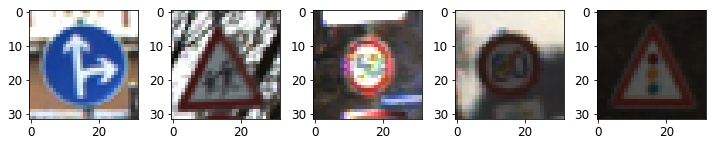

In [13]:

#Split data into training and validation sets
x_train, x_val, y_train, y_val = skl.train_test_split(image_data,image_labels,train_size=0.8, test_size=0.2, random_state=42)

#Display sample data
fig=plt.figure(figsize=(10,20))
for i in range(5):
  fig.add_subplot(1,5,i+1)
  plt.imshow(x_train[i]) 
fig.tight_layout()

**CNN MODEL WITH A CONV-POOL-CONV-POOL-CONV-POOL-FC-FC ARCHITECTURE**

Epoch 1/20
246/246 [==============================] - 10s 40ms/step - loss: 0.8855 - accuracy: 0.7614 - val_loss: 0.1517 - val_accuracy: 0.9660
Epoch 2/20
246/246 [==============================] - 10s 40ms/step - loss: 0.0887 - accuracy: 0.9778 - val_loss: 0.0695 - val_accuracy: 0.9820
Epoch 3/20
246/246 [==============================] - 10s 40ms/step - loss: 0.0397 - accuracy: 0.9890 - val_loss: 0.0492 - val_accuracy: 0.9888
Epoch 4/20
246/246 [==============================] - 10s 40ms/step - loss: 0.0176 - accuracy: 0.9954 - val_loss: 0.0448 - val_accuracy: 0.9878
Epoch 5/20
246/246 [==============================] - 10s 39ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.1124 - val_accuracy: 0.9722
Epoch 6/20
246/246 [==============================] - 10s 39ms/step - loss: 0.0284 - accuracy: 0.9922 - val_loss: 0.0331 - val_accuracy: 0.9920
Epoch 7/20
246/246 [==============================] - 10s 39ms/step - loss: 0.0062 - accuracy: 0.9984 - val_loss: 0.0330 - val_accuracy:

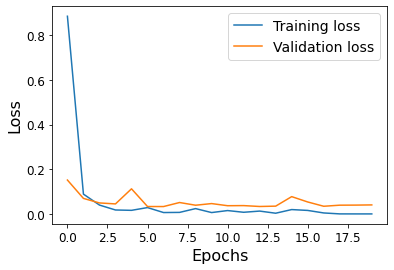

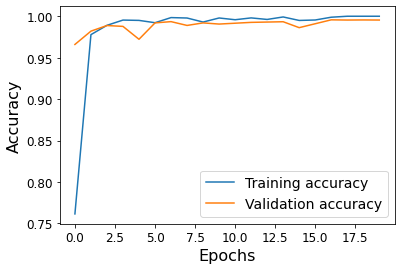

In [14]:
model = keras.models.Sequential(
     [keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
      keras.layers.MaxPool2D(pool_size=(2, 2), strides=1),
      keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1),
      keras.layers.MaxPool2D(pool_size=(2, 2), strides=1),
      keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1),
      keras.layers.MaxPool2D(pool_size=(2, 2), strides=1),
      keras.layers.Flatten(),
      keras.layers.Dense(256, activation='relu'),
      keras.layers.Dense(43, activation='softmax')]
    ) 

# Compile model using adam optimizer 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history=model.fit(x_train, y_train, batch_size=128, epochs=20,validation_data=(x_val,y_val))

# Display various layers of CNN
model.summary()


# Evaluate model against test data
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'\n Test accuracy: {test_acc}')


# Compare training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(['Training loss', 'Validation loss'], fontsize=14)
plt.show()



# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(['Training accuracy', 'Validation accuracy'], fontsize=14)
plt.show()


**CNN MODEL WITH CONV-CONV-POOL-CONV-CONV-POOL-FC-FC ARCHITECTURE**

Epoch 1/20
246/246 [==============================] - 3s 10ms/step - loss: 1.7775 - accuracy: 0.5047 - val_loss: 0.5319 - val_accuracy: 0.8457
Epoch 2/20
246/246 [==============================] - 2s 9ms/step - loss: 0.3131 - accuracy: 0.9132 - val_loss: 0.1957 - val_accuracy: 0.9486
Epoch 3/20
246/246 [==============================] - 2s 9ms/step - loss: 0.1389 - accuracy: 0.9631 - val_loss: 0.1370 - val_accuracy: 0.9625
Epoch 4/20
246/246 [==============================] - 2s 9ms/step - loss: 0.0828 - accuracy: 0.9767 - val_loss: 0.0883 - val_accuracy: 0.9804
Epoch 5/20
246/246 [==============================] - 2s 9ms/step - loss: 0.0570 - accuracy: 0.9843 - val_loss: 0.0792 - val_accuracy: 0.9827
Epoch 6/20
246/246 [==============================] - 2s 9ms/step - loss: 0.0453 - accuracy: 0.9881 - val_loss: 0.0810 - val_accuracy: 0.9805
Epoch 7/20
246/246 [==============================] - 2s 9ms/step - loss: 0.0323 - accuracy: 0.9908 - val_loss: 0.0657 - val_accuracy: 0.9862
Epoch

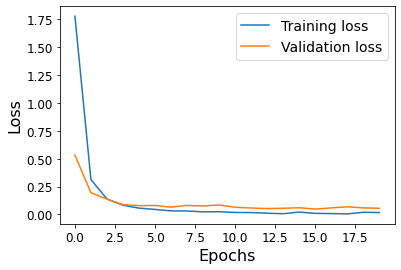

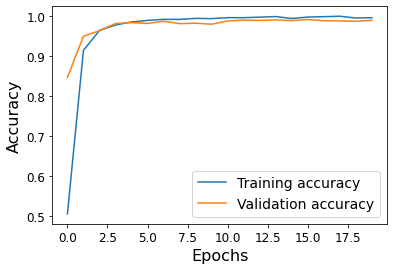

In [15]:
model_mod1 = keras.models.Sequential(
    [keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
      keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1),
      keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
      keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1),
      keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', strides=1),
      keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(43, activation='softmax')]
    ) 

# Compile model using adam optimizer 
model_mod1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history_mod1=model_mod1.fit(x_train, y_train, batch_size=128, epochs=20,validation_data=(x_val,y_val))

# Display various layers of CNN
model_mod1.summary()


# Evaluate model against test data
test_loss_mod1, test_acc_mod1 = model_mod1.evaluate(test_data, test_labels, verbose=2)
print(f'\n Test accuracy: {test_acc_mod1}')


# Compare training and validation loss
plt.plot(history_mod1.history['loss'])
plt.plot(history_mod1.history['val_loss'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(['Training loss', 'Validation loss'], fontsize=14)
plt.show()



# Plot training and validation accuracy
plt.plot(history_mod1.history['accuracy'])
plt.plot(history_mod1.history['val_accuracy'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(['Training accuracy', 'Validation accuracy'], fontsize=14)
plt.show()


**DEFINE A MODEL WITH CONV-CONV-POOL-DROPOUT-CONV-CONV-POOL-DROPOUT-FC-DROPOUT-FC-DROPOUT-FC ARCHITECTURE**

Epoch 1/20
246/246 [==============================] - 3s 10ms/step - loss: 3.0621 - accuracy: 0.1799 - val_loss: 1.7602 - val_accuracy: 0.4953
Epoch 2/20
246/246 [==============================] - 2s 10ms/step - loss: 1.4573 - accuracy: 0.5433 - val_loss: 0.5699 - val_accuracy: 0.8257
Epoch 3/20
246/246 [==============================] - 2s 10ms/step - loss: 0.7758 - accuracy: 0.7443 - val_loss: 0.2888 - val_accuracy: 0.9257
Epoch 4/20
246/246 [==============================] - 2s 10ms/step - loss: 0.5465 - accuracy: 0.8247 - val_loss: 0.2156 - val_accuracy: 0.9578
Epoch 5/20
246/246 [==============================] - 2s 9ms/step - loss: 0.4038 - accuracy: 0.8699 - val_loss: 0.1291 - val_accuracy: 0.9705
Epoch 6/20
246/246 [==============================] - 2s 10ms/step - loss: 0.3312 - accuracy: 0.8944 - val_loss: 0.0799 - val_accuracy: 0.9807
Epoch 7/20
246/246 [==============================] - 2s 10ms/step - loss: 0.2727 - accuracy: 0.9137 - val_loss: 0.0676 - val_accuracy: 0.9818


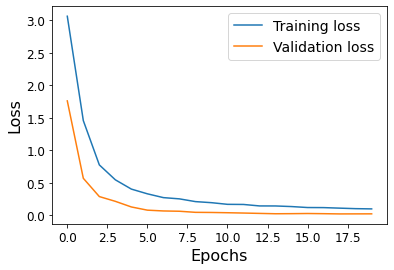

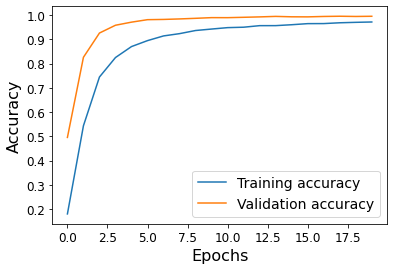

In [16]:

model_mod2 = keras.models.Sequential(
    [keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), strides=1),
      keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1),
      keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
      keras.layers.Dropout(rate=0.25),
      keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1),
      keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', strides=1),
      keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
      keras.layers.Dropout(rate=0.25),
      keras.layers.Flatten(),
      keras.layers.Dense(256, activation='relu'),
      keras.layers.Dropout(rate=0.5),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dropout(rate=0.5),
      keras.layers.Dense(43, activation='softmax')]
    ) 

# Compile model using adam optimizer 
model_mod2.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history_mod2=model_mod2.fit(x_train, y_train, batch_size=128, epochs=20,validation_data=(x_val,y_val))

# Display various layers of CNN
model_mod2.summary()


# Evaluate model against test data
test_loss_mod2, test_acc_mod2 = model_mod2.evaluate(test_data, test_labels, verbose=2)
print(f'\n Test accuracy: {test_acc_mod2}')


# Compare training and validation loss
plt.plot(history_mod2.history['loss'])
plt.plot(history_mod2.history['val_loss'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(['Training loss', 'Validation loss'], fontsize=14)
plt.show()



# Plot training and validation accuracy
plt.plot(history_mod2.history['accuracy'])
plt.plot(history_mod2.history['val_accuracy'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(['Training accuracy', 'Validation accuracy'], fontsize=14)
plt.show()


In [20]:
# Save model
# file_path='/content/drive/My Drive/NSU/Traffic_data'
# model_mod2.save(f'{file_path}/final_model.h5')

**TESTING THE MODEL**

In [17]:
# Define the 43 classes of the road signs

sign_classes={0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing veh over 3.5 tons',
 11: 'Right-of-way at intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Veh > 3.5 tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve left',
 20: 'Dangerous curve right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End speed + passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End no passing veh > 3.5 tons'}

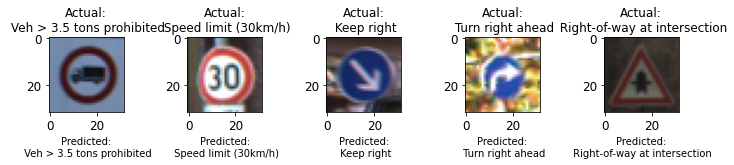

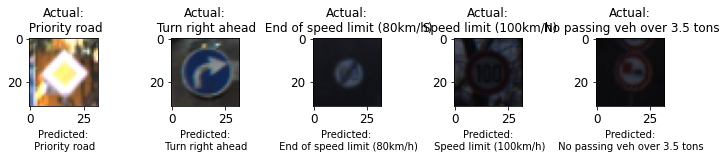

In [18]:
# Predict the classes for the first 5 images in the test dataset
pred_first=[sign_classes[i] for i in (np.argmax(i) for i in model_mod2.predict(test_data[:5]))]
pred_last=[sign_classes[i] for i in (np.argmax(i) for i in model_mod2.predict(test_data[-5:]))]

# Display the first 5 images of the test data and show their actual and predicted class

fig=plt.figure(figsize=(10,20))
for i in range(5):
  fig.add_subplot(1,5,i+1)
  plt.imshow(test_data[i])
  plt.title(f"Actual:\n {sign_classes[test_labels[i]]}")
  plt.xlabel(f"Predicted:\n {pred_first[i]}")
fig.tight_layout()

# Display the last 5 images of the test data and show their actual and predicted class

fig=plt.figure(figsize=(10,25))
for i in range(5):
  fig.add_subplot(1,5,i+1)
  plt.imshow(test_data[i-5])
  plt.title(f"Actual:\n {sign_classes[test_labels[i-5]]}")
  plt.xlabel(f"Predicted:\n {pred_last[i]}")
fig.tight_layout()